## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 4
## KNN - with buildInFnc

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.metrics import *
from sklearn.model_selection import KFold, cross_val_score

In [87]:
df = pd.read_csv(("../data/breast_cancer.csv"), names=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 
    'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'], header=0)
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [88]:
del df['Id']

In [89]:
# changing 2 and 4 to 0 and 1 so that ROC curve doesn't give error
df['Class']=df['Class'].replace([2,4],[0,1])
pd.crosstab(df['Class'],df['Class'])

Class,0,1
Class,,
0,457,0
1,0,241


In [90]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [91]:
df['Bare_Nuclei'].replace('?', pd.NA, inplace=True)
df = df.dropna()
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int64')

/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_81082/2490835602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', pd.NA, inplace=True)
/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_81082/2490835602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [92]:
df.dtypes

Clump_thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [93]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

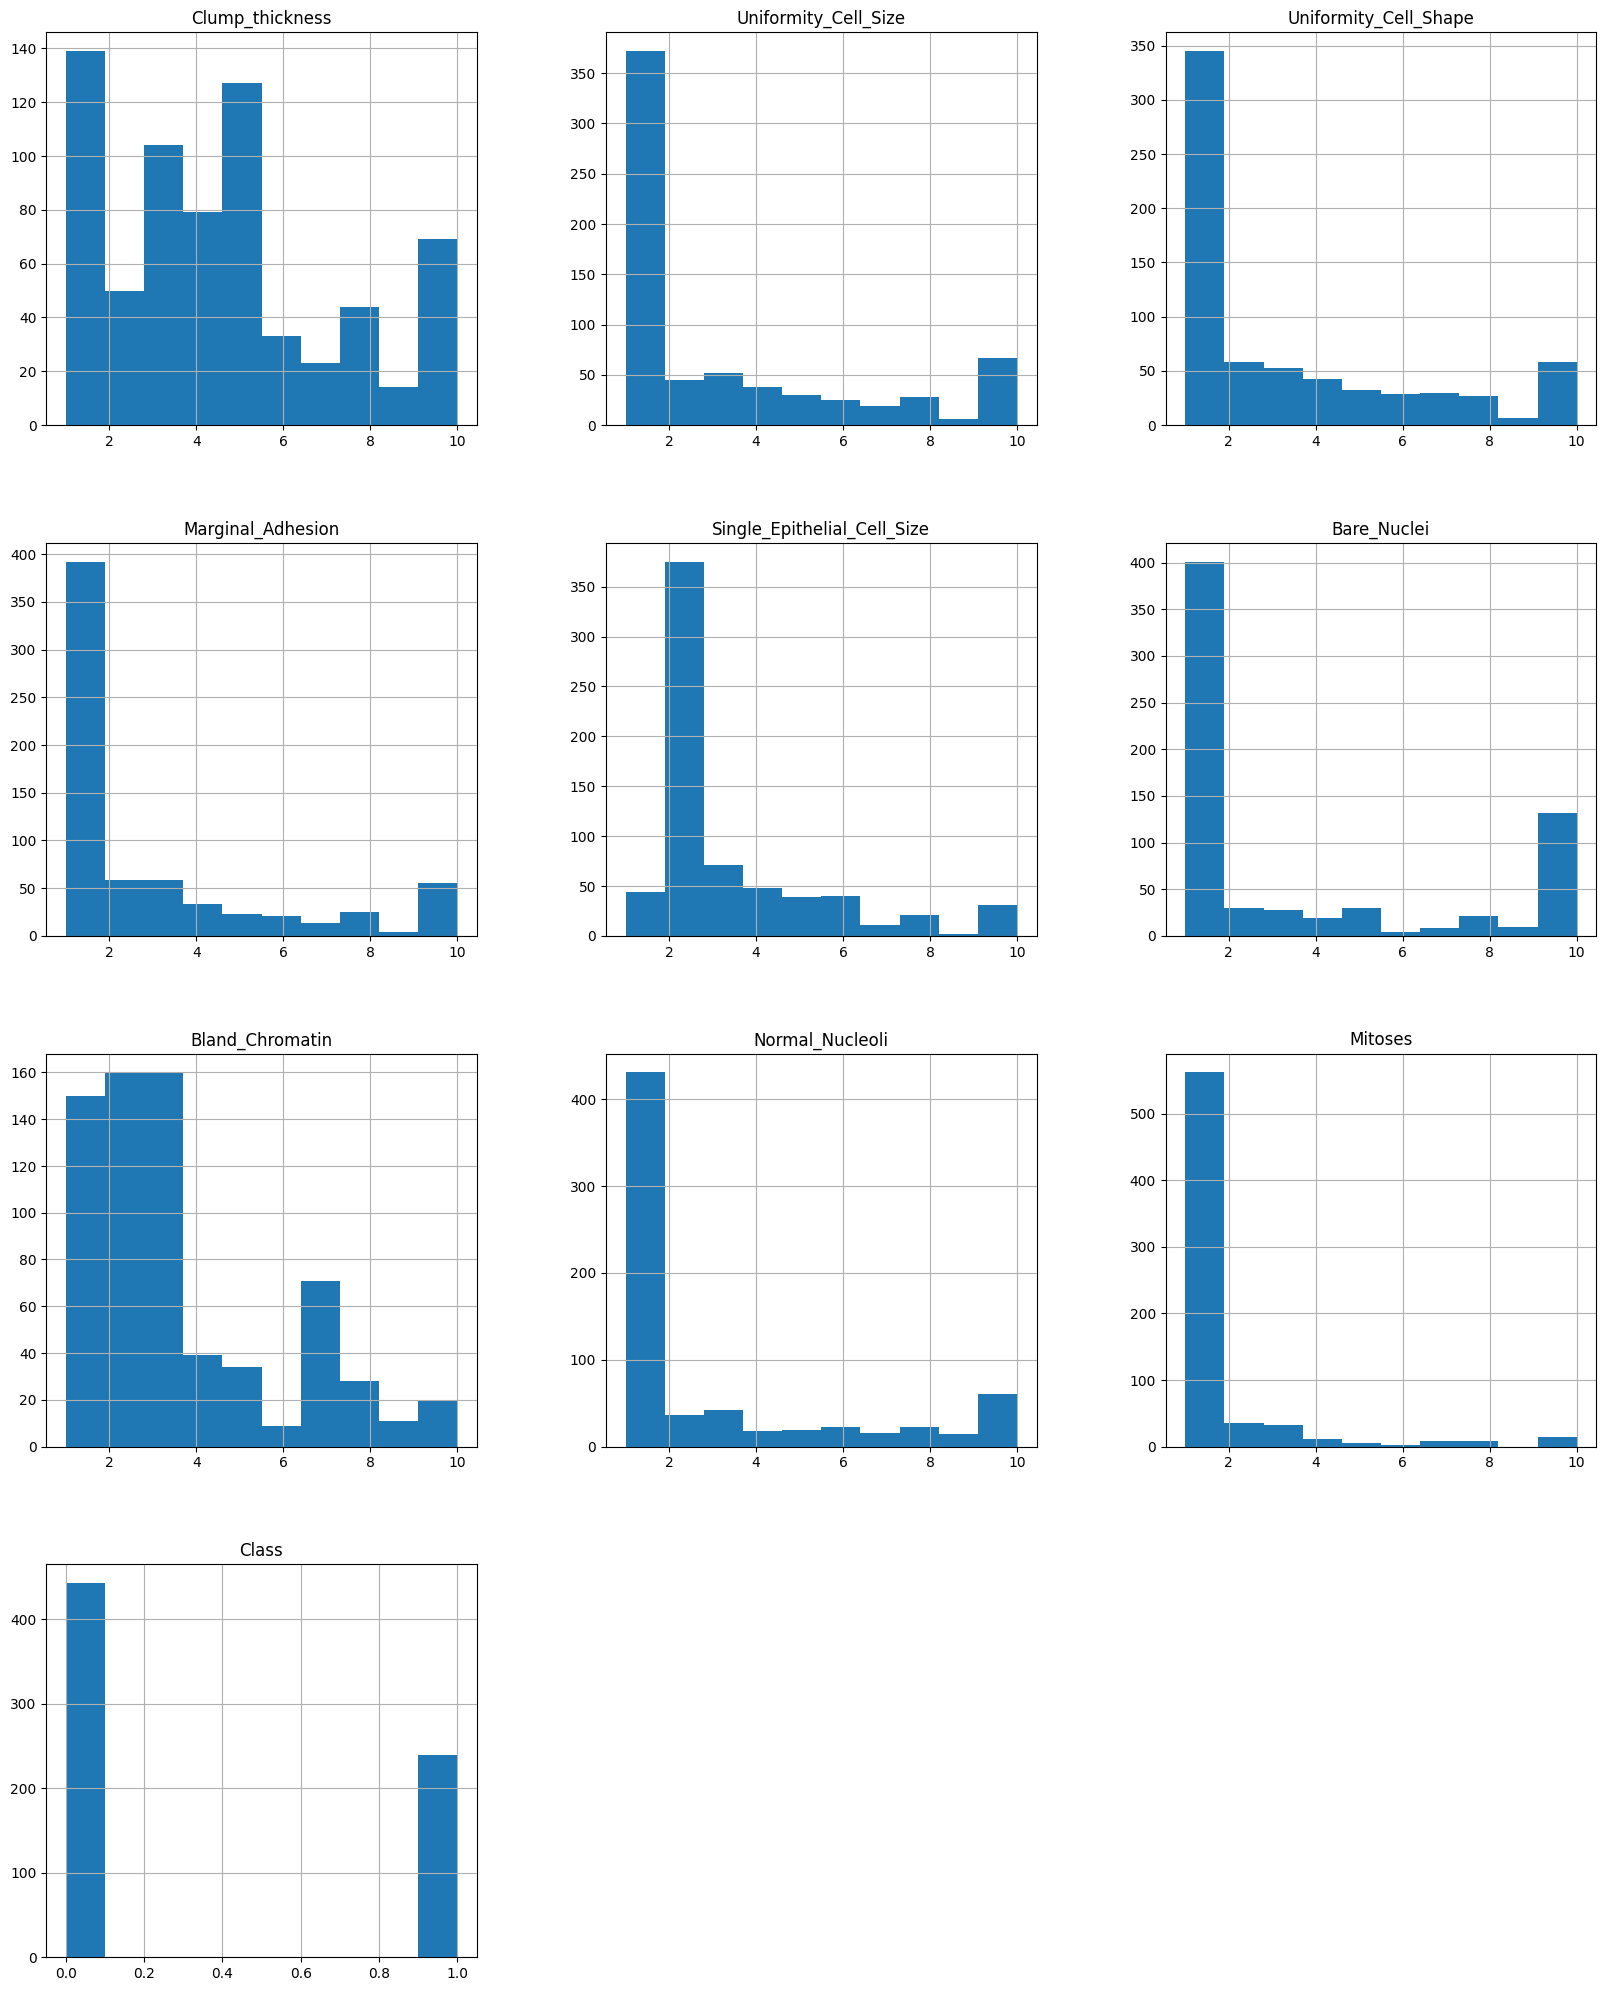

In [94]:
df.hist(figsize=(20,25))
plt.show()

<Axes: >

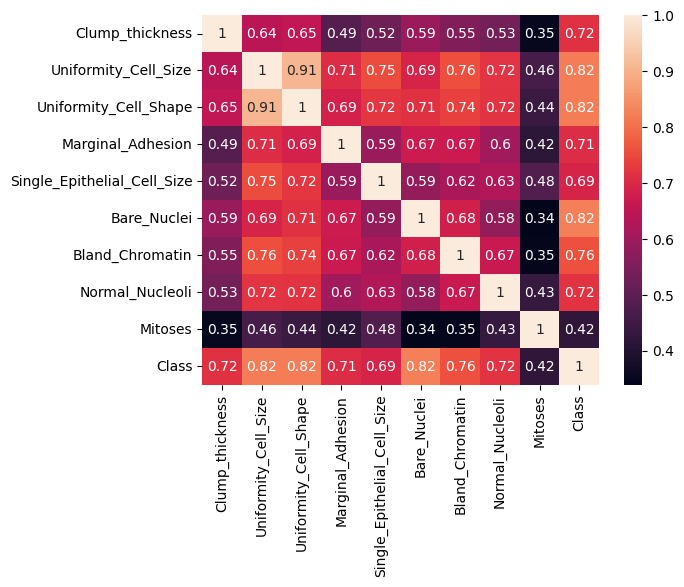

In [95]:
sns.heatmap(df.corr(), annot=True)

In [96]:
x = df.drop('Class', axis=1)
y = df['Class']
print(x)
print(y)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                  5                     4                      4   
1                  3                     1                      1   
2                  6                     8                      8   
3                  4                     1                      1   
4                  8                    10                     10   
..               ...                   ...                    ...   
693                3                     1                      1   
694                2                     1                      1   
695                5                    10                     10   
696                4                     8                      6   
697                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    5                            7           10   
1                    1             

In [97]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [99]:
k=3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred = neigh.predict(x_test)
print(y_pred)

[1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0]


In [101]:
print(accuracy_score(y_pred, y_test))

0.9560975609756097


In [102]:
print(neigh.score(x_test, y_test))
print(neigh.score(x_train, y_train))

0.9560975609756097
0.9790356394129979


In [103]:
print(confusion_matrix(y_test, y_pred))

[[134   2]
 [  7  62]]


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       136
           1       0.97      0.90      0.93        69

    accuracy                           0.96       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.96      0.96      0.96       205



In [105]:
classification_error = 1 - accuracy_score(y_test, y_pred)
print(classification_error)

0.04390243902439028


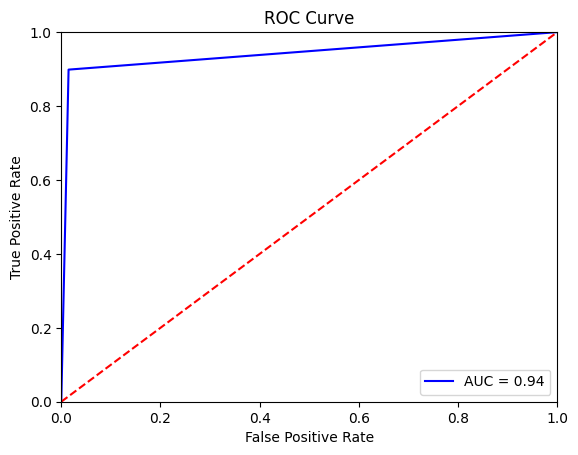

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
roc_auc_score(y_test, y_pred)

0.9419224211423701

In [108]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)
cv_results = cross_val_score(neigh, x, y, cv=kf, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation of accuracy:", cv_results.std())

Cross-validation accuracy scores: [0.95601173 0.98533724]
Mean accuracy: 0.9706744868035191
Standard deviation of accuracy: 0.014662756598240456


In [109]:
def KNNClass(k, split, a, b):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=1-split, random_state=42)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return [k, split*100, (1-split)*100, prec, rec, f1, acc]

In [110]:
dataHead = ['k', 'test', 'train', 'precision', 'recall', 'F1 score', 'accuracy']
dataVal = []
for k in (3,4,5,6,7,8,9):
    for split in (0.7, 0.75, 0.8):
        dataVal.append(KNNClass(k, split, x, y))
print(tabulate(dataVal, headers=dataHead, tablefmt='fancy_grid'))

╒═════╤════════╤═════════╤═════════════╤══════════╤════════════╤════════════╕
│   k │   test │   train │   precision │   recall │   F1 score │   accuracy │
╞═════╪════════╪═════════╪═════════════╪══════════╪════════════╪════════════╡
│   3 │     70 │      30 │    0.96875  │ 0.898551 │   0.932331 │   0.956098 │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   3 │     75 │      25 │    0.964286 │ 0.915254 │   0.93913  │   0.959064 │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   3 │     80 │      20 │    0.958333 │ 0.92     │   0.938776 │   0.956204 │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   4 │     70 │      30 │    0.96875  │ 0.898551 │   0.932331 │   0.956098 │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   4 │     75 │      25 │    0.963636 │ 0.898305 │   0.929825 │   0.953216 │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼

In [111]:
df1 = pd.read_csv("../data/Iris.csv")
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [112]:
sp = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2,
}
df1['Species'] = df1['Species'].map(sp)

In [113]:
del df1['Id']
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [114]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [115]:
df1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [116]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

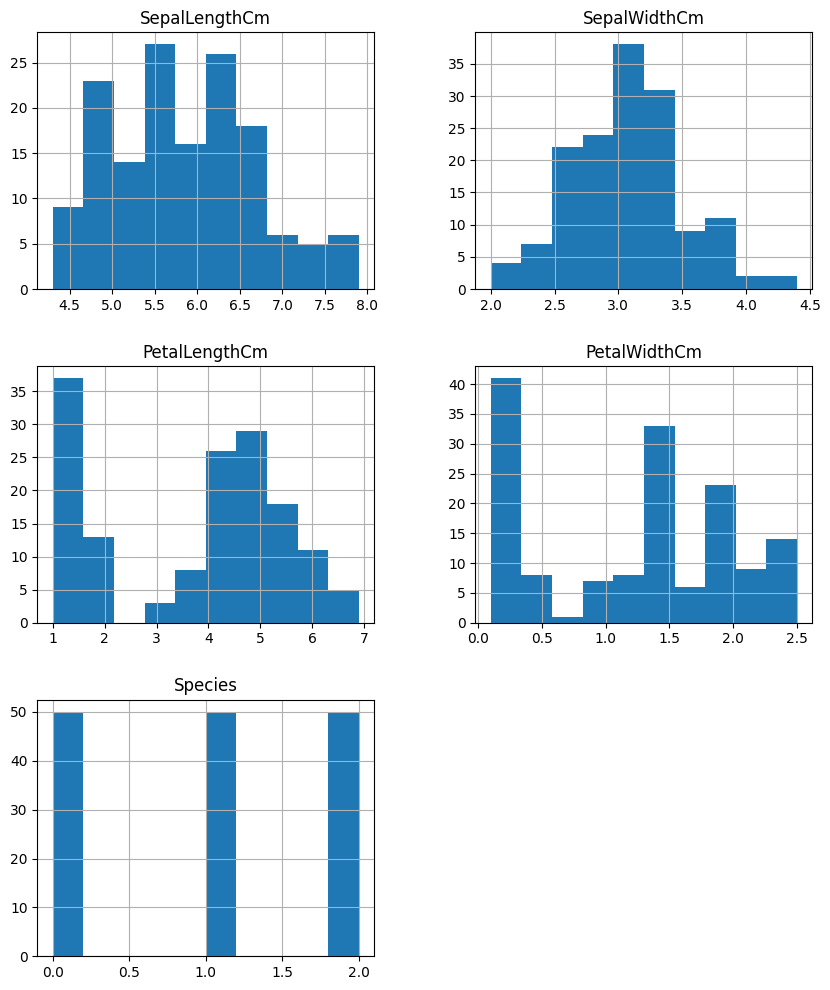

In [117]:
df1.hist(figsize=(10,12))
plt.show()

<Axes: >

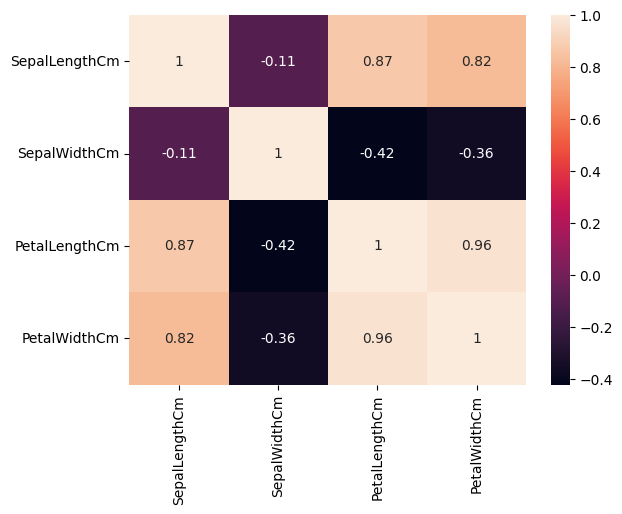

In [118]:
sns.heatmap(df1.drop('Species', axis=1).corr(), annot=True)

In [119]:
x1 = df1.drop('Species', axis=1)
y1 = df1['Species']
print(x)
print(y)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                  5                     4                      4   
1                  3                     1                      1   
2                  6                     8                      8   
3                  4                     1                      1   
4                  8                    10                     10   
..               ...                   ...                    ...   
693                3                     1                      1   
694                2                     1                      1   
695                5                    10                     10   
696                4                     8                      6   
697                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    5                            7           10   
1                    1             

In [120]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x1)

In [121]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [122]:
k=3
neigh1 = KNeighborsClassifier(n_neighbors=k)
neigh1.fit(x1_train, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
y1_pred = neigh1.predict(x1_test)
print(y1_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [124]:
print(accuracy_score(y1_pred, y1_test))

1.0


In [125]:
print(neigh1.score(x1_test, y1_test))
print(neigh1.score(x1_train, y1_train))

1.0
0.9428571428571428


In [126]:
print(confusion_matrix(y1_test, y1_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [127]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [128]:
classification_error = 1 - accuracy_score(y1_test, y1_pred)
print(classification_error)

0.0


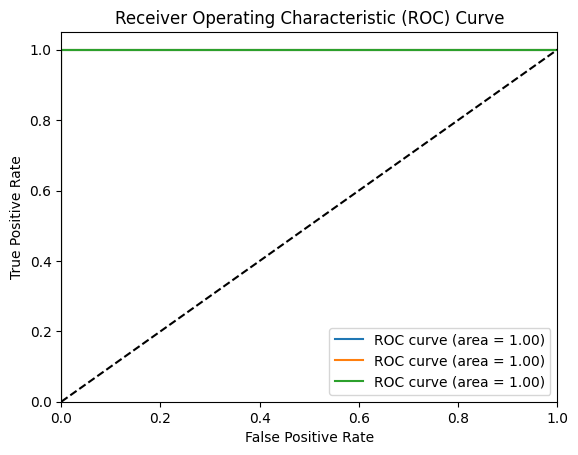

In [136]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], (y1_pred == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [139]:
roc_auc_score(y1_test, y1_pred, multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

In [131]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)
cv_results = cross_val_score(neigh, x1, y1, cv=kf, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation of accuracy:", cv_results.std())

Cross-validation accuracy scores: [0.97333333 0.94666667]
Mean accuracy: 0.96
Standard deviation of accuracy: 0.013333333333333364


In [140]:
def KNNClass1(k, split, a, b):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=1-split, random_state=42)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    prec = precision_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
    rec = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
    acc = accuracy_score(y_test, y_pred)
    return [k, split*100, (1-split)*100, prec, rec, f1, acc]


In [141]:
dataHead1 = ['k', 'test', 'train', 'precision', 'recall', 'F1 score', 'accuracy']
dataVal1 = []
for k in (3,4,5,6,7,8,9):
    for split in (0.7, 0.75, 0.8):
        dataVal1.append(KNNClass1(k, split, x1, y1))
print(tabulate(dataVal1, headers=dataHead1, tablefmt='fancy_grid'))

╒═════╤════════╤═════════╤═════════════╤══════════╤════════════╤════════════╕
│   k │   test │   train │   precision │   recall │   F1 score │   accuracy │
╞═════╪════════╪═════════╪═════════════╪══════════╪════════════╪════════════╡
│   3 │     70 │      30 │    1        │ 1        │   1        │   1        │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   3 │     75 │      25 │    1        │ 1        │   1        │   1        │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   3 │     80 │      20 │    1        │ 1        │   1        │   1        │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   4 │     70 │      30 │    1        │ 1        │   1        │   1        │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼────────────┤
│   4 │     75 │      25 │    1        │ 1        │   1        │   1        │
├─────┼────────┼─────────┼─────────────┼──────────┼────────────┼